In [1]:
import numpy as np
import cv2
import os, os.path

# Construcción de la base de datos
imageDir='200/'
image_set=[]

valid_extensions = [".jpg", ".jpeg"]
file_list = os.listdir(imageDir)

for file in file_list:
    extension = os.path.splitext(file)[1]
    if extension.lower() not in valid_extensions:
        continue
    image_set.append(os.path.join(imageDir, file))

dict = {}

for imageName in image_set:
    image = cv2.imread(imageName, 0) # 0 para escala de grises
    hist = cv2.calcHist([image],[0], None, [8], [0, 256]) 
    #  None - no usar ninguna máscara o parte de la imagen 
    # [8] calcular las porciones por tono de gris
    # [0, 256] valor minimo y maximo de la escala de gris
    desc = hist.flatten()  # Aplana y asegura que el arreglo es unidimensional
    desc = desc / (image.shape[0] * image.shape[1]) # Normaliza el histograma con el tamaño de la imagen
    dict[imageName] = desc

In [3]:
dict

{'200/200261029_3bc17e9c2a.jpg': array([0.10612267, 0.15014933, 0.146896  , 0.078992  , 0.078544  ,
        0.12528533, 0.309376  , 0.00463467]),
 '200/200757597_891b7b6076.jpg': array([0.07101502, 0.12295495, 0.15723123, 0.19787988, 0.18703303,
        0.14241441, 0.08445646, 0.03701502]),
 '200/200222288_3784ad9568.jpg': array([0.00886933, 0.08942933, 0.17589867, 0.254576  , 0.258368  ,
        0.137168  , 0.059712  , 0.01597867]),
 '200/200611301_8d95104b56.jpg': array([0.13450825, 0.00660726, 0.00523432, 0.00579538, 0.00842904,
        0.82493729, 0.00729373, 0.00719472]),
 '200/200537853_b4f2b6d79a.jpg': array([0.24102933, 0.23766933, 0.25534933, 0.15150933, 0.045568  ,
        0.03260267, 0.02409067, 0.01218133]),
 '200/200249310_c4bb68a932.jpg': array([0.02377711, 0.07812048, 0.09601807, 0.049     , 0.04355422,
        0.47831928, 0.21048795, 0.02072289]),
 '200/200757303_cbc284a479.jpg': array([0.278     , 0.22154896, 0.11956677, 0.05560831, 0.07087834,
        0.10545994, 0.10

In [16]:
# Consultar una imagen
import random

# Escoger una imagen aleatoria
queryName = random.choice(file_list)
queryImage= cv2.imread(os.path.join(imageDir, queryName), 0)
queryHist = cv2.calcHist([queryImage], [0], None, [8], [0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

# Calcular distancia a los histogramas almacenados
distances=[]
for imageName in image_set:
    dist = np.linalg.norm(descQuery - dict[imageName])
    distances.append(dist)
    
index = np.argsort(distances) # Ordena la lista de distancias, devuelve los indices de los elementos en el orden correcto

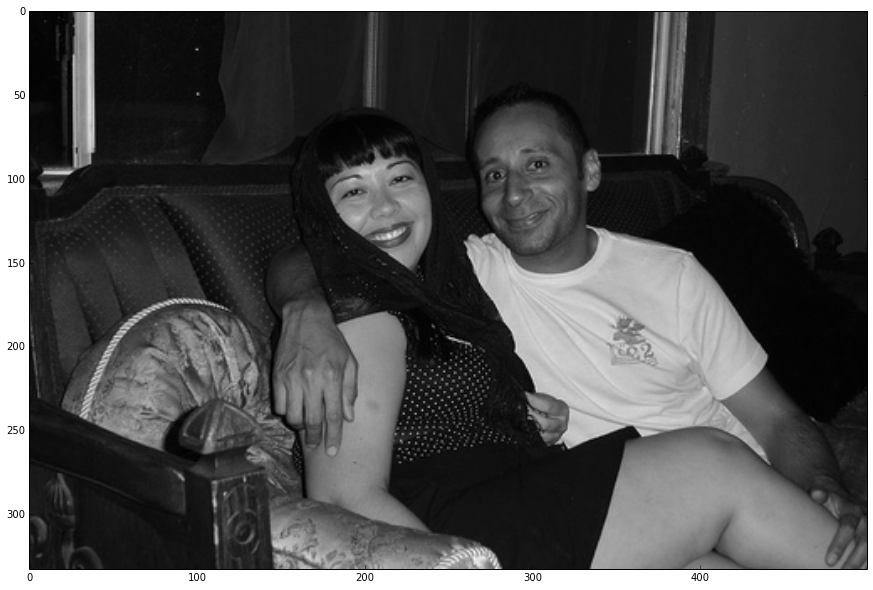

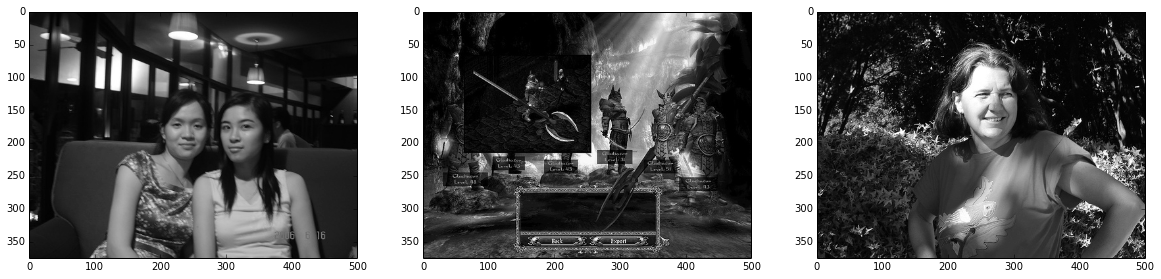

In [17]:
# Visualizacion

from matplotlib import pyplot as plt
%matplotlib inline
# fig1 = plt.imshow(queryImage[:,:,::-1]) # RGB -> BGR
fig1 = plt.figure(figsize=(20, 10))
fig1 = plt.imshow(queryImage, cmap = 'gray')
plt.show()

fig2 = plt.figure(figsize=(20, 10))

#for i in range(1,4):
#    v = np.where(index==i)
#    fig2.add_subplot(1, 3, i)
#    imag = cv2.imread(image_set[v[0][0]])
#    plt.imshow(imag, cmap = 'gray')
    
for i in range(1,4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]],0)
    plt.imshow(imag, cmap = 'gray')
    
plt.show();